In [2]:
from Graph import Graph
import networkx as nx
from deterministic_attack import DeterministicAttack
from revisited_spectral import RevisitedSpectral
from erdos import SpectralAttack
import numpy as np
from helpers import *

%reload_ext autoreload
%autoreload 2


def generate_random_graph(n, p):
    Gnx = nx.erdos_renyi_graph(n, p)
    return Graph.from_adj_matrix(nx.to_numpy_array(Gnx).astype(int))


[]


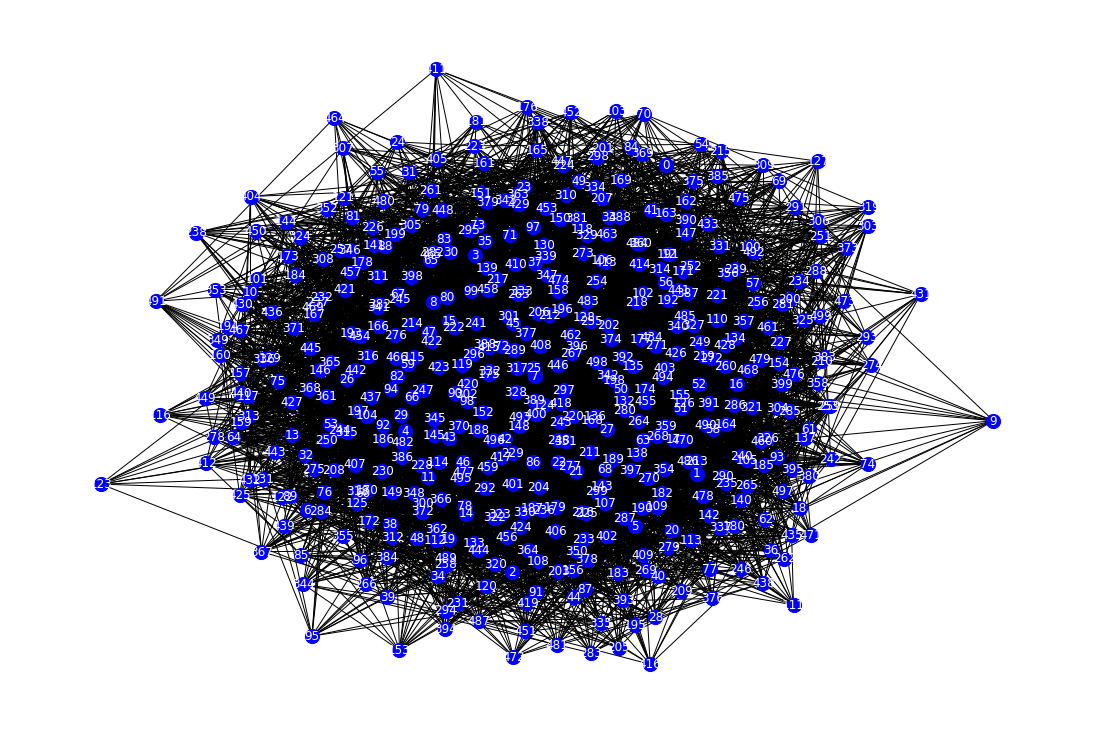

In [ ]:
# G = Graph.barabasi_albert_graph(100, 4, 4)
# G = Graph.from_txt("datasets/counter_example.txt")
# G = generate_random_graph(100, 0.3)

G = generate_random_graph(500, 0.05)
Gnx = nx.from_numpy_matrix(G.adj_matrix)
plt.figure(figsize=(15, 10))
nx.draw(Gnx, with_labels=True, font_color='white', font_size=12, node_size=200, node_color='blue', edge_color='black')
G1, G2 = G.split_dataset(graph1_prop=0.0)
Gsquare = np.dot(G.adj_matrix, G.adj_matrix)


G.to_txt("erdos/datasets/random.txt")




In [ ]:
normal_sanity_check_errors = []
early_stop_errors = []
erdos_errors = []


for _ in range(1):
    
    # G = generate_random_graph(500, 0.05)
    # G1, G2 = G.split_dataset(graph1_prop=0.0)
    # Gsquare = np.dot(G.adj_matrix, G.adj_matrix)


    # #### Normal sanity check ####
    # deter = DeterministicAttack(G1, Gsquare)
    # deter.run()
    # Gstar = deter.get_Gstar()

    # proba = RevisitedSpectral(Gstar, Gsquare)
    # proba.run(alpha=0.0, beta=0.0, gamma=0.0)
    # proba.sanity_check_with_high_loss()
    # Gstar = proba.get_Gstar()

    # deter = DeterministicAttack(Gstar, Gsquare)
    # deter.run()
    # Gstar = deter.get_Gstar()

    # Gstar_fixed = Gstar.copy() 
    # Gstar_fixed.fix_edges(0)
    # normal_sanity_check_errors.append(ROC_stats(Gstar_fixed, G))
    # print(ROC_stats(Gstar_fixed, G))



    # #### Early stop test ####
    # deter = DeterministicAttack(G1, Gsquare)
    # deter.run()
    # Gstar = deter.get_Gstar()

    # proba = RevisitedSpectral(Gstar, Gsquare)
    # proba.run(alpha=0.0, beta=0.0, gamma=0.0)
    # we_stopped_early = proba.sanity_check_with_early_stop(0.05)
    # Gstar = proba.get_Gstar()
    # if not we_stopped_early:
    #     Gstar = proba.get_Gstar()
    #     deter = DeterministicAttack(Gstar, Gsquare)
    #     deter.run()
    #     Gstar = deter.get_Gstar()

    # Gstar_fixed = Gstar.copy() 
    # Gstar_fixed.fix_edges(0)
    # early_stop_errors.append(ROC_stats(Gstar_fixed, G))
    # print(ROC_stats(Gstar_fixed, G))



    ### Erdos test ###
    proba = SpectralAttack(G1, Gsquare)
    proba.run()
    Gstar = proba.get_Gstar()
    erdos_errors.append(ROC_stats(Gstar, G))
    print(ROC_stats(Gstar, G))

    


Spectral attack: 100%|██████████| 500/500 [00:01<00:00, 433.01it/s]


(2, 22, 237464, 12512)


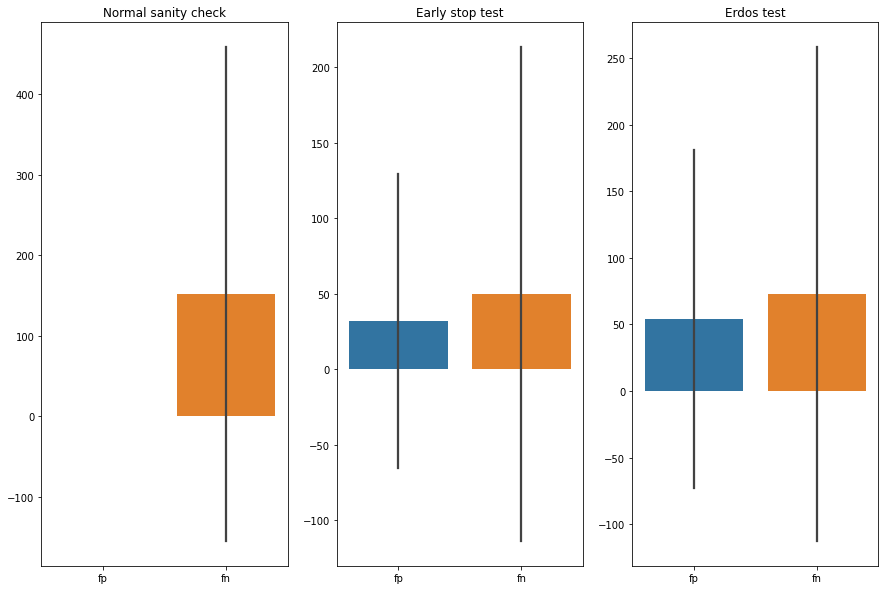

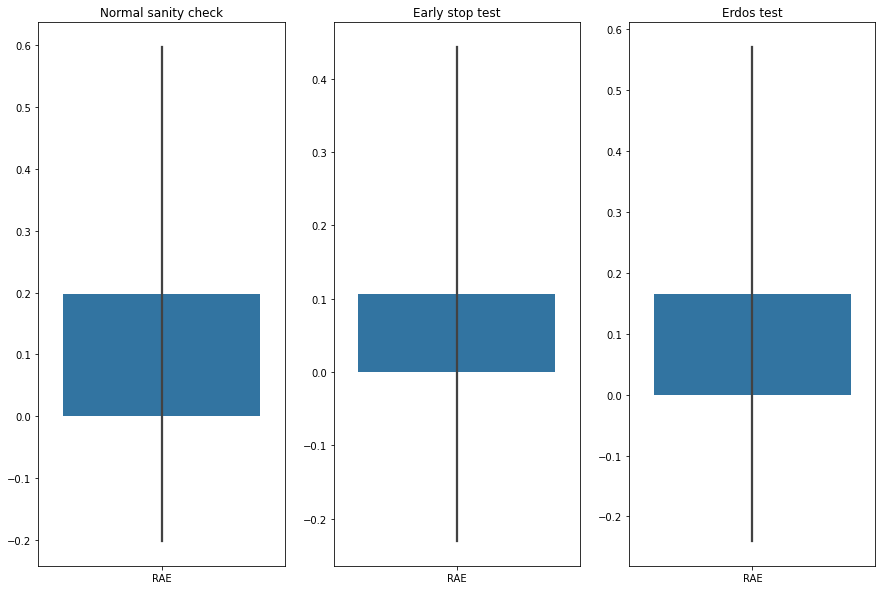

In [ ]:
import seaborn as sns
import pandas as pd
# plot the results. Each data in the list is a tuple of tp, fp, tn, fn
normal_sanity_check_errors = np.array(normal_sanity_check_errors)
early_stop_errors = np.array(early_stop_errors)
erdos_errors = np.array(erdos_errors)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
normal_sanity_check_errors = pd.DataFrame(normal_sanity_check_errors, columns=['tp', 'fp', 'tn', 'fn'])
normal_sanity_check_errors["RAE"] = (normal_sanity_check_errors["fn"] + normal_sanity_check_errors["fp"]) / (normal_sanity_check_errors["fn"] + normal_sanity_check_errors["tp"])
early_stop_errors = pd.DataFrame(early_stop_errors, columns=['tp', 'fp', 'tn', 'fn'])
early_stop_errors["RAE"] = (early_stop_errors["fn"] + early_stop_errors["fp"]) / (early_stop_errors["fn"] + early_stop_errors["tp"])
erdos_errors = pd.DataFrame(erdos_errors, columns=['tp', 'fp', 'tn', 'fn'])
erdos_errors["RAE"] = (erdos_errors["fn"] + erdos_errors["fp"]) / (erdos_errors["fn"] + erdos_errors["tp"])


ax = plt.subplot(1, 3, 1)
sns.barplot(data=normal_sanity_check_errors[["fp", "fn"]], errorbar='sd', ax=ax)
plt.title("Normal sanity check")

ax = plt.subplot(1, 3, 2)
sns.barplot(data=early_stop_errors[["fp", "fn"]], errorbar='sd', ax=ax)
plt.title("Early stop test")

ax = plt.subplot(1, 3, 3)
sns.barplot(data=erdos_errors[["fp", "fn"]], errorbar='sd', ax=ax)
plt.title("Erdos test")

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
sns.barplot(data=normal_sanity_check_errors[["RAE"]], errorbar='sd')
plt.title("Normal sanity check")

plt.subplot(1, 3, 2)
sns.barplot(data=early_stop_errors[["RAE"]], errorbar='sd')
plt.title("Early stop test")

plt.subplot(1, 3, 3)
sns.barplot(data=erdos_errors[["RAE"]], errorbar='sd')
plt.title("Erdos test")



plt.show()



In [ ]:
def search_counter_example():
    found = False
    while not found:
        G = Graph.barabasi_albert_graph(100, 4, 4)
        G1, G2 = G.split_dataset(graph1_prop=0.0)
        Gsquare = np.dot(G.adj_matrix, G.adj_matrix)


        deter = DeterministicAttack(G1, Gsquare)
        deter.run()
        Gstar = deter.get_Gstar()
        proba = RevisitedSpectral(Gstar, Gsquare)
        proba.run(alpha=0.0, beta=0.0, gamma=0.0)
        proba.sanity_check()
        Gstar = proba.get_Gstar()
        deter = DeterministicAttack(Gstar, Gsquare)
        deter.run()
        Gstar_ours = deter.get_Gstar()
        Gstar_ours.fix_edges(0)
        TP_ours, FP_ours, TN_ours, FN_ours = ROC_stats(Gstar_ours, G)

        print("Ours", TP_ours, FP_ours, TN_ours, FN_ours)

        proba = SpectralAttack(Gsquare)
        proba.run()
        Gstar_erdos = proba.get_Gstar()
        TP_erdos, FP_erdos, TN_erdos, FN_erdos = ROC_stats(Gstar_erdos, G)
        print("Erdos", TP_erdos, FP_erdos, TN_erdos, FN_erdos)

        if FP_ours + FN_ours > FP_erdos + FN_erdos:
            print("Found counter example")
            print("Ours", FP_ours + FN_ours)
            print("Erdos", FP_erdos + FN_erdos)
            found = True
            break
    
    G.to_txt("counter_example.txt")
        
# search_counter_example()